In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

Read the data from the h5py file and understand the train/test splits

In [5]:
import h5py
import numpy as np

h5f = h5py.File("/content/drive/MyDrive/dataset/SVHN_single_grey1.h5", 'r')

X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

In [6]:
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [7]:
dset = h5f['X_test']

In [8]:
dset.shape

(18000, 32, 32)

In [9]:
dset[0]

array([[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904, 112.1646],
       [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475, 109.9368],
       [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414, 109.1048],
       ...,
       [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074, 112.7346],
       [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 , 114.3431],
       [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017, 114.1906]],
      dtype=float32)

In [10]:
h5f.close()

In [11]:
from keras.utils import np_utils

seed = 7
np.random.seed(seed)

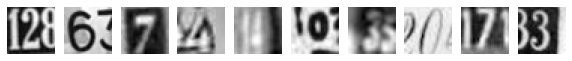

label for each of the above image : [2 6 7 4 4 0 3 0 7 3]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize= (10,1))
for i in range(10):
  plt.subplot(1,10, i+1)
  plt.imshow(X_train[i], cmap = "gray")
  plt.axis('off')
plt.show()
print('label for each of the above image : %s' %(y_train1[0:10]))

Reshape and normalize the train and test features

In [13]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

X_train = X_train / 255.0
X_test = X_test / 255.0


print('Training set', X_train.shape, y_train1.shape)
print('Test set', X_test.shape, y_test1.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [14]:
print(y_test1.shape)

(18000,)


One hot encode the labels for train and test data

In [15]:
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

num_classes = y_test.shape[1]
num_hidden = 32

In [16]:
num_classes

10

In [17]:
x_tr = []
for i in range(42000):
  x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
  x_te.append(X_test[i,:].flatten())

In [18]:
x_tr = x_tr[:2000]
x_te = x_te[:2000]

In [19]:
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

In [20]:
a = []
j = []
def knnvalue(k):
  from sklearn.neighbors import KNeighborsClassifier
  NNH = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
  NNH.fit(x_tr, y_tr)
  predicted_labels = NNH.predict(x_te)
  from sklearn.metrics import accuracy_score
  ascore = accuracy_score(y_te, predicted_labels)
  MSE = 1-ascore
  a.append(MSE)
  j.append(k)
  print(ascore)

In [21]:
for i in range(1,10,2):
  knnvalue(i)

0.2975
0.292
0.3015
0.307
0.3055


In [22]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', metric = 'euclidean')
NNH.fit(x_tr, y_tr)
pred = NNH.predict(x_te)

In [23]:
pred[0]

6

In [24]:
y_test1[0]

1

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, y_te)

array([[104,  17,  22,  28,  29,  36,  40,  14,  51,  43],
       [ 11, 101,  25,  31,  23,  26,  22,  27,  19,  15],
       [ 12,  18,  71,  22,  20,  18,  16,  49,  17,  24],
       [ 15,   9,  18,  33,  11,  20,  12,  19,  20,  15],
       [ 15,  14,   8,  13,  84,  15,  20,   9,  10,   9],
       [ 10,   6,   8,  22,   6,  46,  11,   3,  11,  13],
       [ 26,  12,   6,   9,  11,  16,  53,   5,  30,  19],
       [  4,   5,  16,   9,   4,   6,   3,  72,   6,  10],
       [  6,   2,   4,   9,   4,  10,  13,   2,  22,  16],
       [ 18,   1,   9,   9,  12,  18,  12,   5,  12,  38]])

In [26]:
from sklearn.metrics import classification_report
cr = classification_report(y_te, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.47      0.34       221
           1       0.34      0.55      0.42       185
           2       0.27      0.38      0.31       187
           3       0.19      0.18      0.18       185
           4       0.43      0.41      0.42       204
           5       0.34      0.22      0.27       211
           6       0.28      0.26      0.27       202
           7       0.53      0.35      0.42       205
           8       0.25      0.11      0.15       198
           9       0.28      0.19      0.23       202

    accuracy                           0.31      2000
   macro avg       0.32      0.31      0.30      2000
weighted avg       0.32      0.31      0.30      2000



In [ ]:
Here the Recall and precision values are very low using KNN

# from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu

Define the model architecture using TensorFlow with a flatten layer followed by dense layers with
activation as ReLu and softmax



Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the
metric for evaluation

In [28]:
def nn_model():
  model = Sequential()
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(256, activation='relu'))

  model.add(Dense(num_classes, activation='softmax'))

  adam = Adam(lr = 0.0001)
  rms = RMSprop(lr = 0.001)
  sgd = SGD(lr = 0.001)
  agr = Adagrad(lr = 0.05, initial_accumulator_value=0.1, epsilon= 1e-07)
  ad1 = Adadelta(lr = 0.001)

  model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics= ['accuracy'])
  return model

Fit and evaluate the model.

In [29]:
model = nn_model()

#es= EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size = 256, verbose = 2)

#print("Error: %.2%%" % (100 - scores[1]*100))

model.summary()

Epoch 1/30
165/165 - 6s - loss: 2.2356 - accuracy: 0.2036 - val_loss: 2.1090 - val_accuracy: 0.3262
Epoch 2/30
165/165 - 5s - loss: 1.9390 - accuracy: 0.4124 - val_loss: 1.7510 - val_accuracy: 0.4928
Epoch 3/30
165/165 - 6s - loss: 1.6051 - accuracy: 0.5450 - val_loss: 1.4777 - val_accuracy: 0.5771
Epoch 4/30
165/165 - 6s - loss: 1.3837 - accuracy: 0.6095 - val_loss: 1.3061 - val_accuracy: 0.6264
Epoch 5/30
165/165 - 5s - loss: 1.2497 - accuracy: 0.6444 - val_loss: 1.2020 - val_accuracy: 0.6537
Epoch 6/30
165/165 - 6s - loss: 1.1569 - accuracy: 0.6695 - val_loss: 1.1281 - val_accuracy: 0.6707
Epoch 7/30
165/165 - 6s - loss: 1.0932 - accuracy: 0.6841 - val_loss: 1.0755 - val_accuracy: 0.6849
Epoch 8/30
165/165 - 6s - loss: 1.0454 - accuracy: 0.6952 - val_loss: 1.1240 - val_accuracy: 0.6544
Epoch 9/30
165/165 - 6s - loss: 1.0083 - accuracy: 0.7047 - val_loss: 1.0025 - val_accuracy: 0.7089
Epoch 10/30
165/165 - 6s - loss: 0.9630 - accuracy: 0.7161 - val_loss: 0.9854 - val_accuracy: 0.7048

In [34]:
model.evaluate(X_test, y_test, verbose=0)

[0.7157168388366699, 0.7916111350059509]

In [30]:
for l in model.layers:
  print(l.name, l.input_shape,'==>', l.output_shape)
  print()
  model.summary()

dense (None, 1024) ==> (None, 1024)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,314,570
Trainable params: 1,314,570
Non-trainable params: 0
_________________________________________________________________
dense_1 (None, 1024) ==> (None, 256)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)  

loss and accuracy for the test data

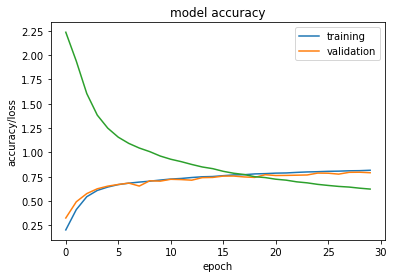

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc= 'best')
plt.show()

In [32]:
history.history['loss']

[2.2356414794921875,
 1.939022183418274,
 1.605086088180542,
 1.38368821144104,
 1.2497044801712036,
 1.1569337844848633,
 1.093158483505249,
 1.0454400777816772,
 1.0082558393478394,
 0.9630337357521057,
 0.930118203163147,
 0.9053220152854919,
 0.876537024974823,
 0.8507115244865417,
 0.8333434462547302,
 0.8060235381126404,
 0.7860748767852783,
 0.7730705738067627,
 0.7505733966827393,
 0.7417044639587402,
 0.7250043749809265,
 0.7150391340255737,
 0.6978844404220581,
 0.6874423027038574,
 0.6719623804092407,
 0.6608039140701294,
 0.6507704854011536,
 0.6440920829772949,
 0.6326518058776855,
 0.6234098076820374]

In [33]:
history.history['accuracy']

[0.20361904799938202,
 0.41240477561950684,
 0.5450476408004761,
 0.609499990940094,
 0.6443571448326111,
 0.6695238351821899,
 0.6841428279876709,
 0.6952381134033203,
 0.7046904563903809,
 0.7161190509796143,
 0.7266904711723328,
 0.732452392578125,
 0.7423095107078552,
 0.749833345413208,
 0.7525476217269897,
 0.7612380981445312,
 0.7689762115478516,
 0.7711190581321716,
 0.7793095111846924,
 0.7822380661964417,
 0.7872381210327148,
 0.7891666889190674,
 0.7949761748313904,
 0.7995476126670837,
 0.8020238280296326,
 0.8058333396911621,
 0.8077380657196045,
 0.8113571405410767,
 0.8127142786979675,
 0.8169524073600769]